In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

#Se cargan y observan los datos
data_frame = pd.read_csv("weatherAUS.csv")
data_frame

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [2]:
data_frame.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [3]:
data_frame.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [4]:
print(data_frame.groupby('RainTomorrow').size())

RainTomorrow
No     110316
Yes     31877
dtype: int64


In [5]:
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

In [6]:
data_nan = data_frame.dropna()
data_nan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Eliminamos las columnas objeto que no usaremos
data_nan = data_nan.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)


#Transformamos los datos tipo objeto a numeros
data_nan["RainTomorrow"] = data_nan["RainTomorrow"].replace("No",0)
data_nan["RainTomorrow"] = data_nan["RainTomorrow"].replace("Yes",1)

data_nan["RainToday"] = data_nan["RainToday"].replace("No",0)
data_nan["RainToday"] = data_nan["RainToday"].replace("Yes",1)

data_nan

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0.0,0
139109,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0.0,0
139110,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0.0,0
139111,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0.0,0


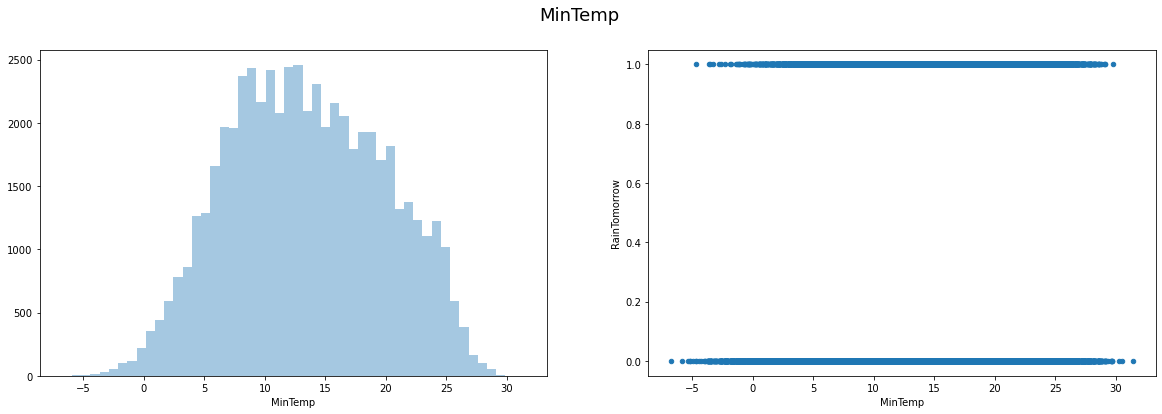

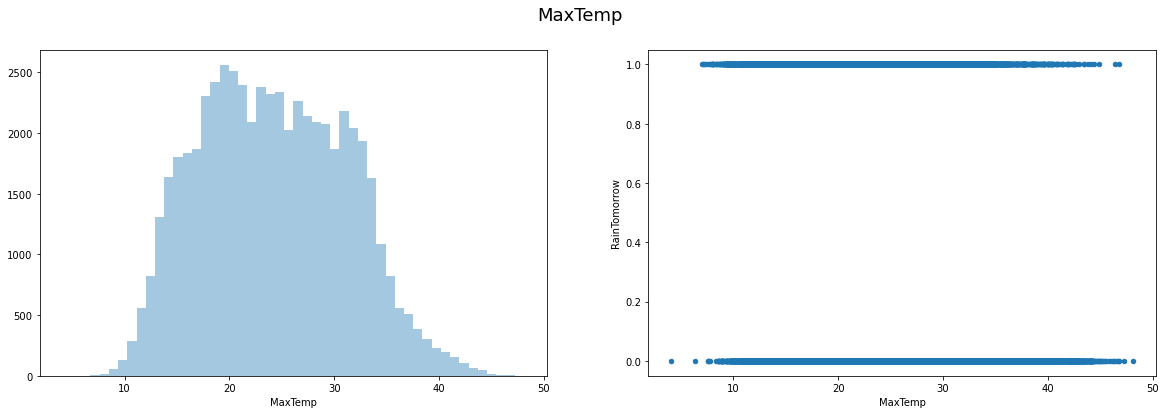

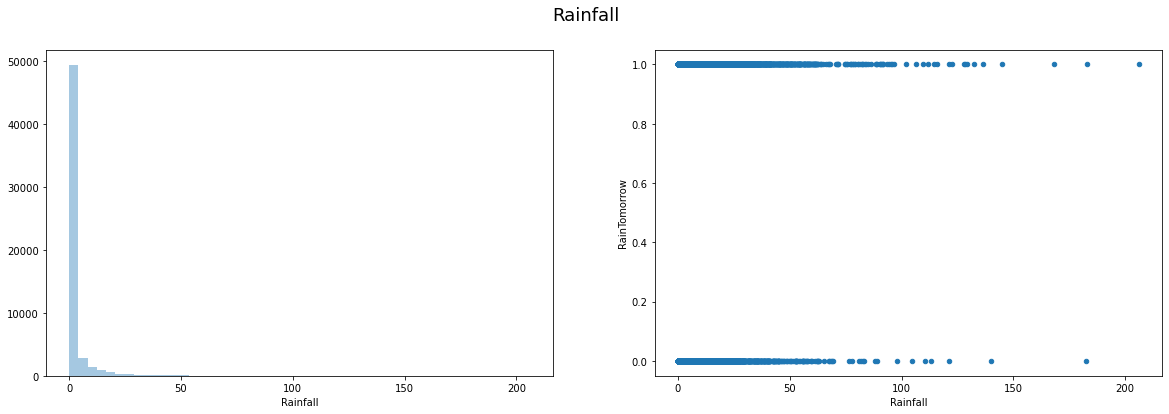

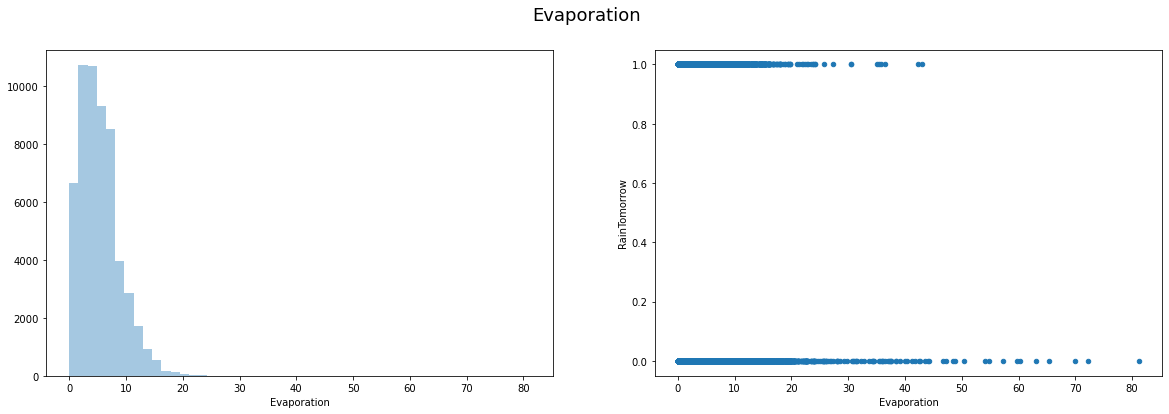

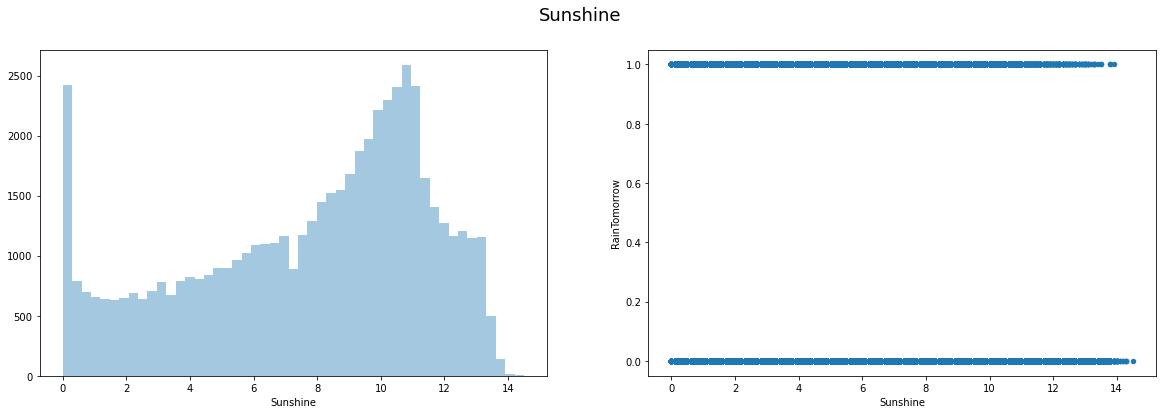

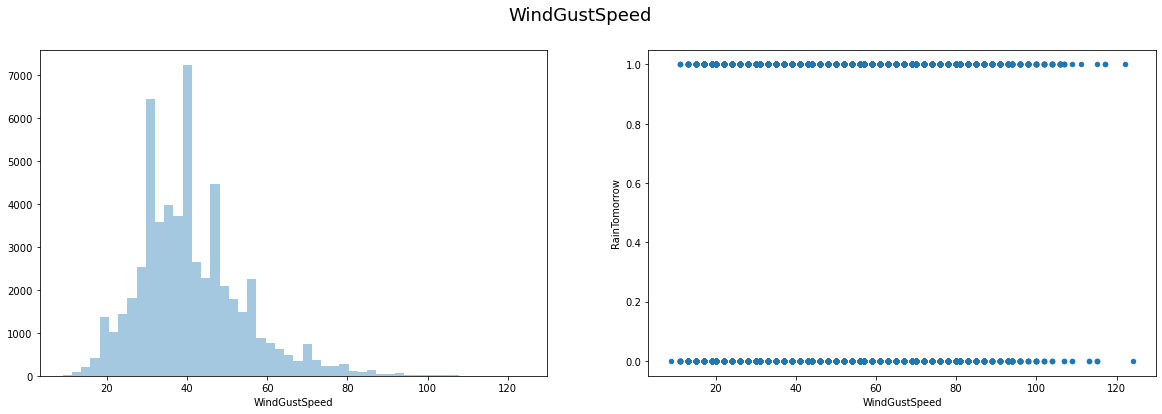

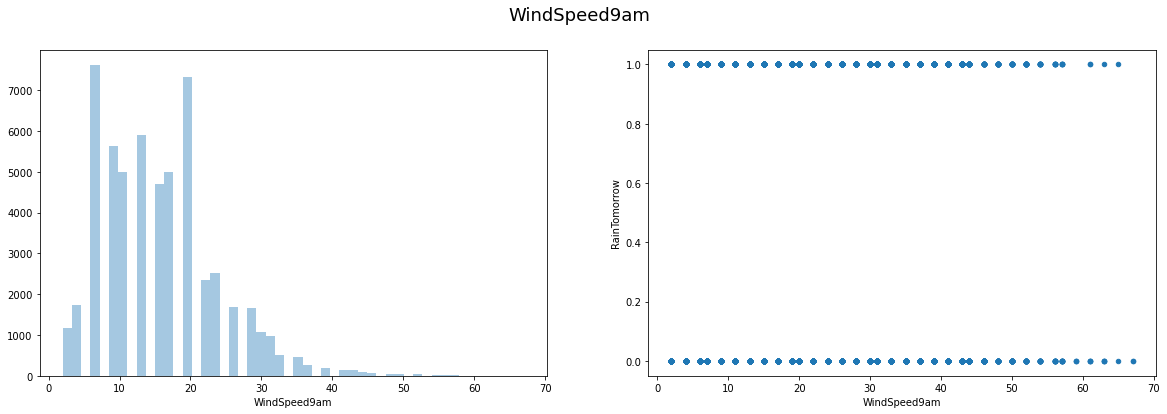

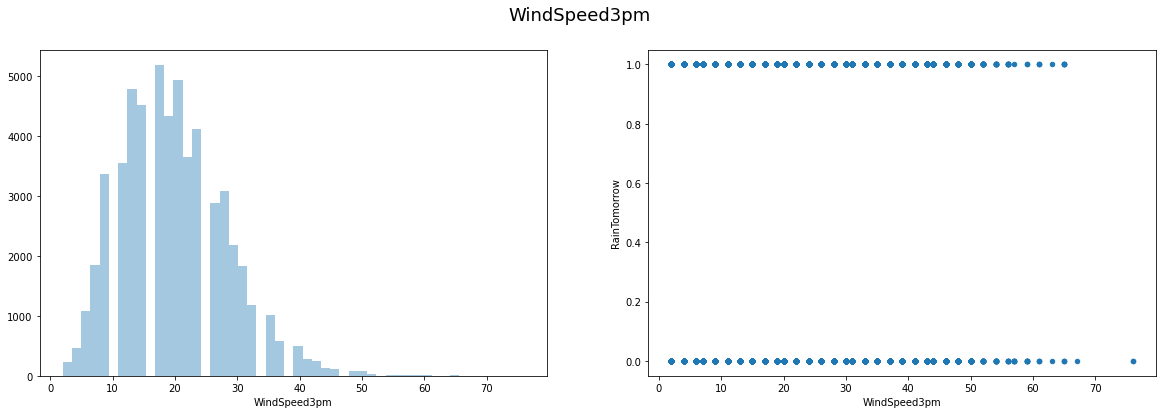

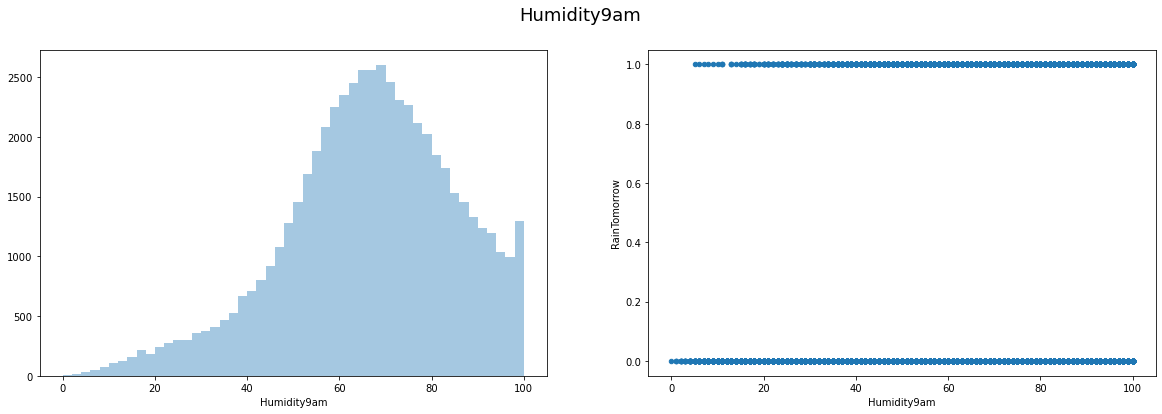

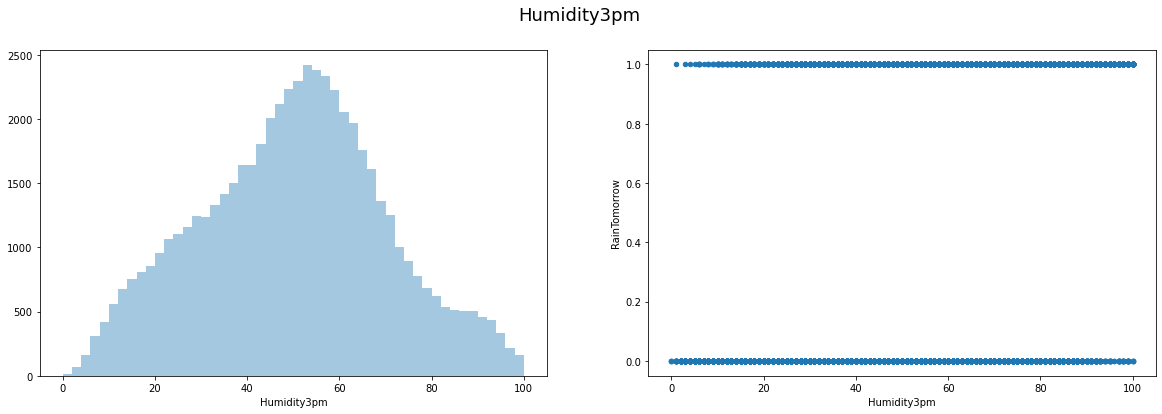

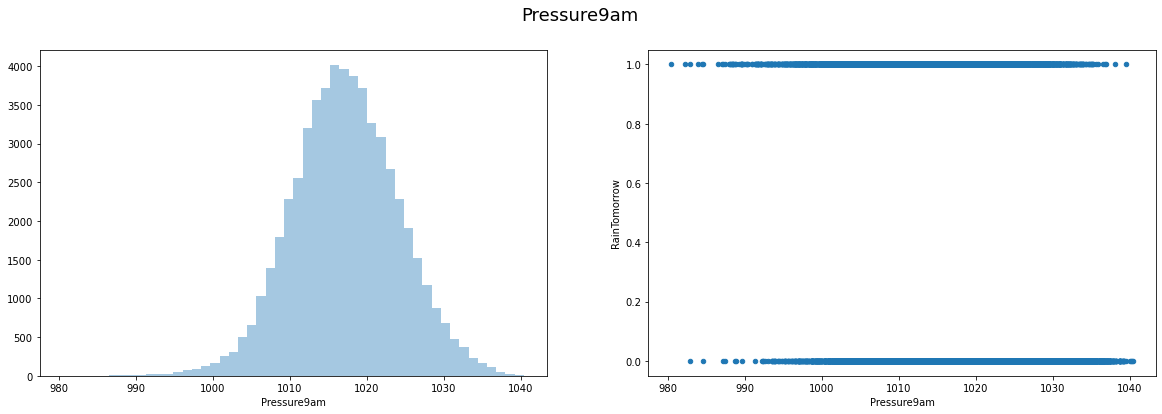

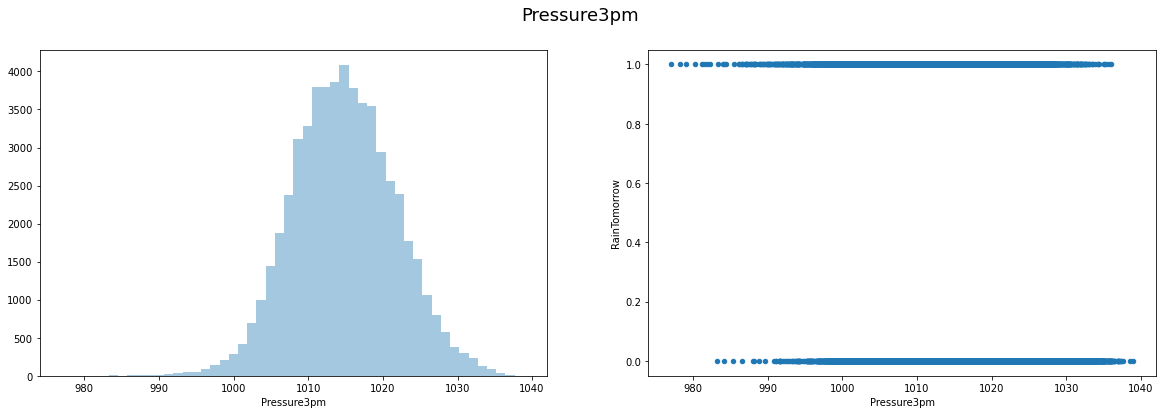

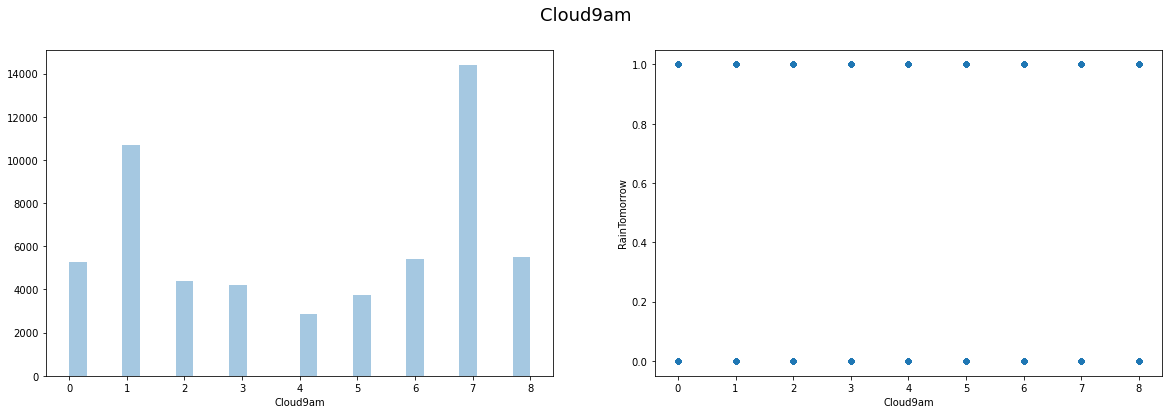

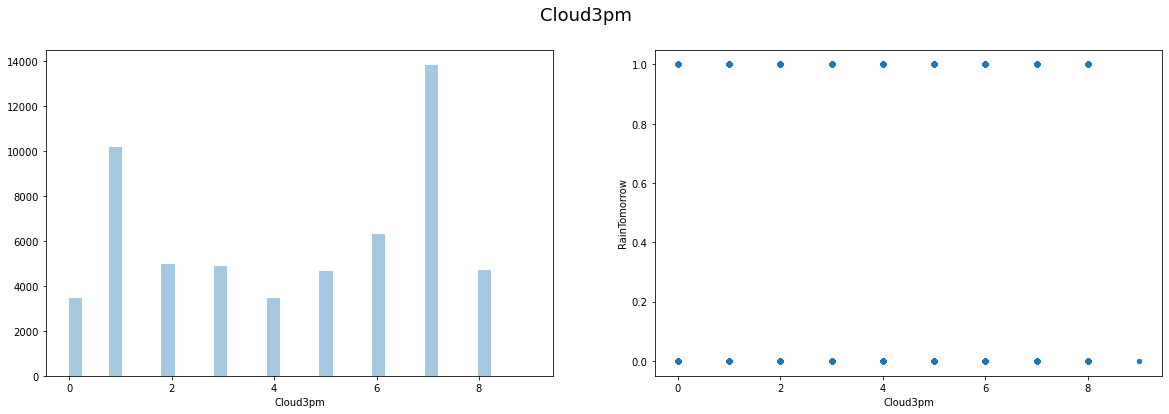

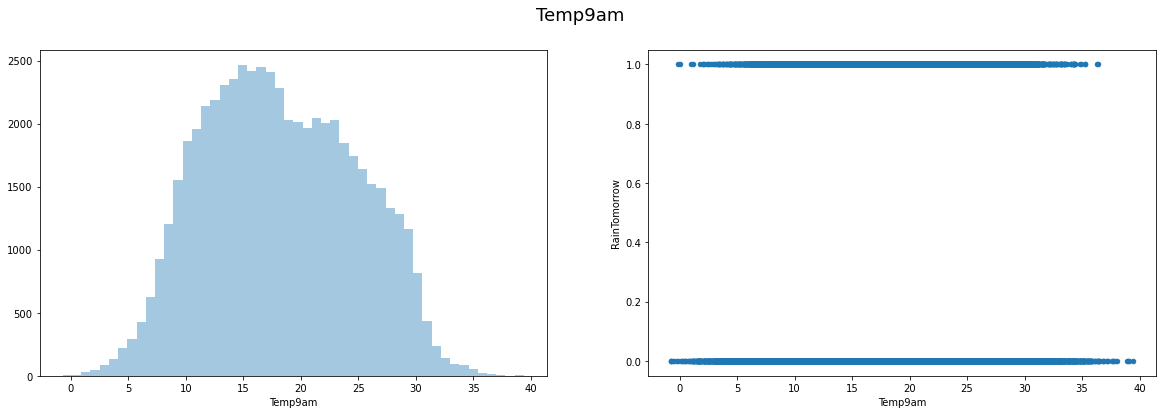

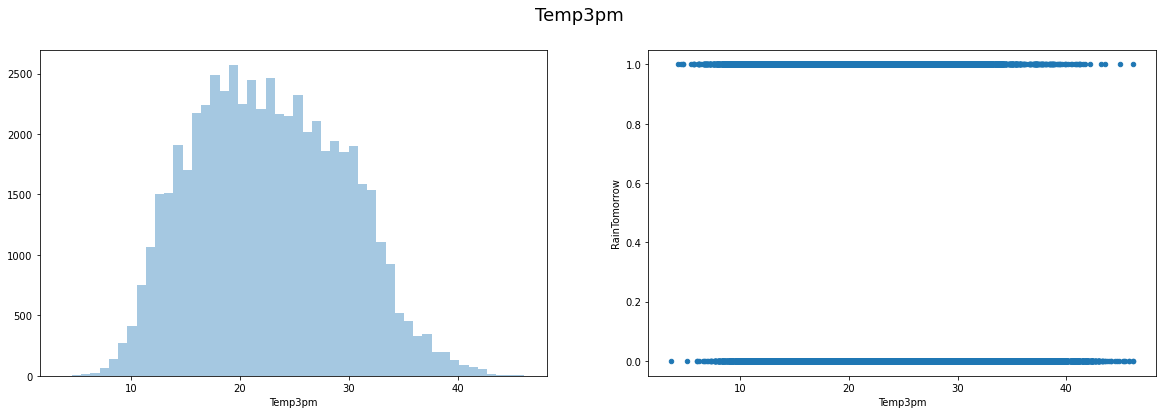

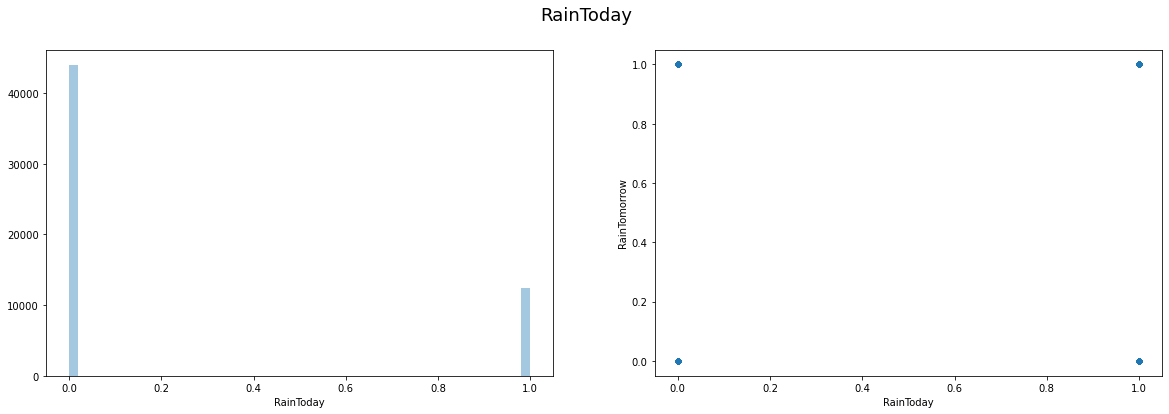

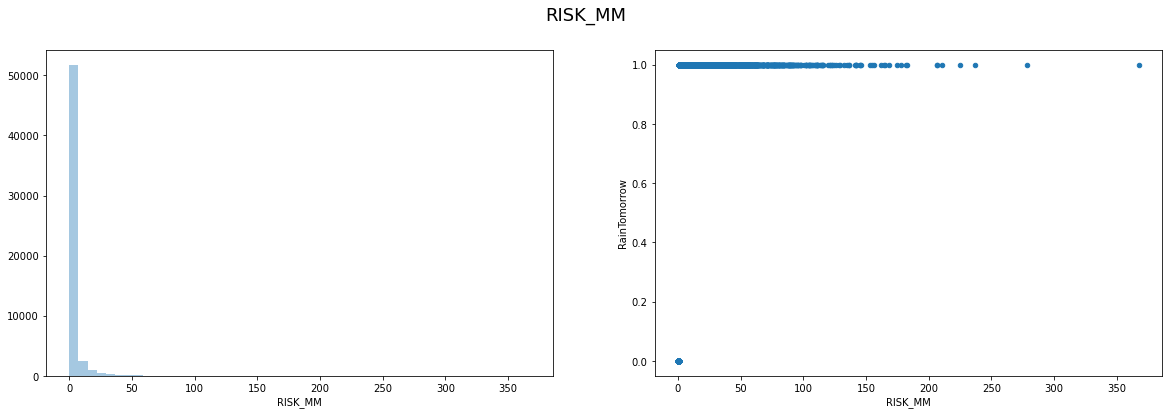

In [10]:
columnas = np.array(data_nan.columns)

for col in columnas[:-1]:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_nan[col], ax=ax[0], kde=False)
    data_nan[[col]+['RainTomorrow']].plot.scatter(x=col, y='RainTomorrow', ax=ax[1])
    plt.show()

In [11]:
X = data_nan.drop('RainTomorrow', axis=1)
y = data_nan['RainTomorrow']

In [12]:
from sklearn.naive_bayes import GaussianNB

#Se definen las variables de train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state = 29)

#Se utiliza el modelo y se muestra la precisión
modelo = GaussianNB()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
print('Precisión del modelo:',modelo.score(X_train,y_train),'\n')

#Se muestran casos positivos en Train y Test
print(f'''Casos positivos en Train = {np.round(y_train.value_counts(normalize=True)[1]*100,2)}%
Casos positivos en Test = {np.round(y_test.value_counts(normalize=True)[1]*100,2)}%''')

Precisión del modelo: 0.9423175390917327 

Casos positivos en Train = 22.06%
Casos positivos en Test = 21.73%


<AxesSubplot:title={'center':'Matriz de confusion'}>

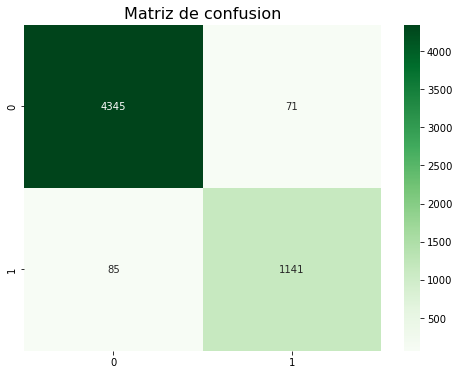

In [13]:
#Se importa la regresión logistica
from sklearn.linear_model import LogisticRegression
#Importamos las librerias para realizar las evaluaciones
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score

#Se definen las variables a utilizar
lr = LogisticRegression(random_state=29)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
accuracy = round(accuracy_score(y_test,preds)*100,2)

#Se muestra la matriz de confusión para el modelo
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusion', size=16)
sns.heatmap(cm, annot=True, fmt='g', cmap="Greens")

In [14]:
#Se importa la libreria metrics que permite ver las diferentes medidas de los modelos
from sklearn import metrics

#Se define la variable que se utilizará para obtener la métrica
y_pred_prob = lr.predict_proba(X_test)[::,1]

#Se realiza el cálculo de AUC
auc = metrics.roc_auc_score(y_test,y_pred_prob)

print('AUC =',auc)
print('Precision =', precision_score(y_test,preds))
print('Accuracy =', accuracy_score(y_test,preds))
print('F1 del modelo =', f1_score(y_test,preds))
print('Recall =', recall_score(y_test,preds))

AUC = 0.9953300839894084
Precision = 0.9414191419141914
Accuracy = 0.9723502304147466
F1 del modelo = 0.9360131255127153
Recall = 0.9306688417618271


In [15]:
#Se importa la libreria SelectKBest
from sklearn.feature_selection import SelectKBest

#Se define las variables a utilizar en la matriz de correlacion, en este caso, todas las columnas
best=SelectKBest(k='all')
X_new = best.fit_transform(X,y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


<AxesSubplot:title={'center':'Matriz de confusion'}>

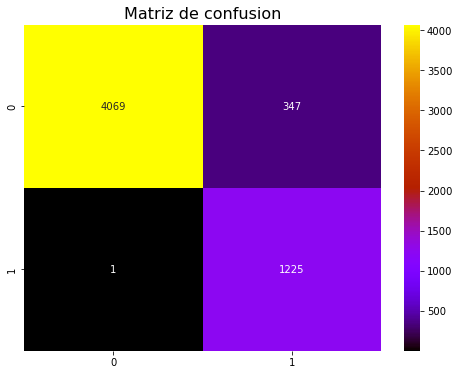

In [16]:
#Entrenamiento del modelo
model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

#Evaluar el modelo
cm =confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusion', size=16)
sns.heatmap(cm,annot=True,cmap='gnuplot',fmt='g')

<AxesSubplot:title={'center':'Correlacion de columnas'}>

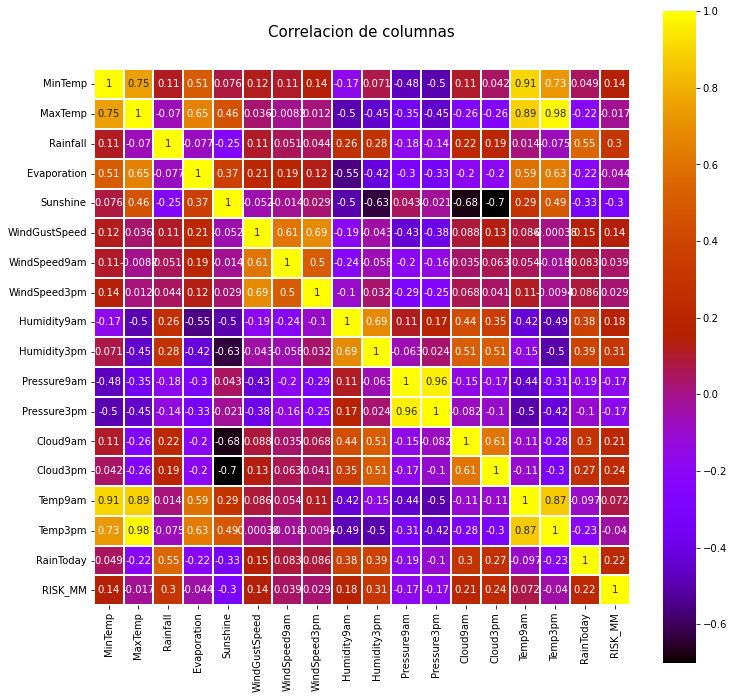

In [18]:
#Se muestra la correlación de columnas con los datos seleccionados anteriormente
used_features = X.columns[selected]
plt.figure(figsize=(12,12))
plt.title('Correlacion de columnas', y=1.05, size=15)
sns.heatmap(data_nan[used_features].astype(float).corr(),linewidth=0.1,square=True, cmap='gnuplot', linecolor='white', annot=True)

In [19]:
#Se realiza el cálculo de AUC
auc = metrics.roc_auc_score(y_test,preds)

print('AUC =',auc)
print('Precision =', precision_score(y_test,preds))
print('Accuracy =', accuracy_score(y_test,preds))
print('F1 del modelo =', f1_score(y_test,preds))
print('Recall =', recall_score(y_test,preds))

AUC = 0.9603032203820603
Precision = 0.7792620865139949
Accuracy = 0.9383197447713577
F1 del modelo = 0.875625446747677
Recall = 0.9991843393148451


In [ ]:
data_nan = data_nan.drop(['Pressure3pm','Cloud9am','WindSpeed3pm','Humidity9am','Temp9am'], axis=1)